In [1]:
print("1.0 Introduction")

1.0 Introduction


In [2]:
print("Build a model to warn the driver in advance by predicting the reason for queue and if any accident ahead in the route, then it should analyse the data and alert the driver either to drive carefully to avoid accident or provide an alternate best route to the destination.")

Build a model to warn the driver in advance by predicting the reason for queue and if any accident ahead in the route, then it should analyse the data and alert the driver either to drive carefully to avoid accident or provide an alternate best route to the destination.


In [3]:
print ("1.1 Data Description")

1.1 Data Description


In [4]:
print("To build the model we will use sample data set made available by open sources (i.e. govt open portal or some research groups) in this case we use Data_Collisions.csv file. We will have to first balance the data set to avoid creating a biased model. Some of the key data elements like Vehicle location , Weather Condition, Car Speed, Light Condition, Road Condition, Junction near the incident, No of People Involved in the incident and No of Vehicles Involved in the incident will be used for building the model.")

To build the model we will use sample data set made available by open sources (i.e. govt open portal or some research groups) in this case we use Data_Collisions.csv file. We will have to first balance the data set to avoid creating a biased model. Some of the key data elements like Vehicle location , Weather Condition, Car Speed, Light Condition, Road Condition, Junction near the incident, No of People Involved in the incident and No of Vehicles Involved in the incident will be used for building the model.


In [5]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [6]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_afe8f4bb19674ac392038ecafc1687f1 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='65Knd4NC1G6384RHFK_wgu9vKAm-VwyxfSF8iNAoGxaf',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_afe8f4bb19674ac392038ecafc1687f1.get_object(Bucket='courseracapstone-donotdelete-pr-bzybvk19rsvbfh',Key='Data-Collisions.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_csv(body)
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [7]:
print(len(df))

194673


In [8]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [59]:
# % of missing.
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

SEVERITYCODE - 0.0%
X - 3.0%
Y - 3.0%
OBJECTID - 0.0%
INCKEY - 0.0%
COLDETKEY - 0.0%
REPORTNO - 0.0%
STATUS - 0.0%
ADDRTYPE - 1.0%
INTKEY - 67.0%
LOCATION - 1.0%
EXCEPTRSNCODE - 56.0%
EXCEPTRSNDESC - 97.0%
SEVERITYCODE.1 - 0.0%
SEVERITYDESC - 0.0%
COLLISIONTYPE - 3.0%
PERSONCOUNT - 0.0%
PEDCOUNT - 0.0%
PEDCYLCOUNT - 0.0%
VEHCOUNT - 0.0%
INCDATE - 0.0%
INCDTTM - 0.0%
JUNCTIONTYPE - 3.0%
SDOT_COLCODE - 0.0%
SDOT_COLDESC - 0.0%
INATTENTIONIND - 85.0%
UNDERINFL - 3.0%
WEATHER - 3.0%
ROADCOND - 3.0%
LIGHTCOND - 3.0%
PEDROWNOTGRNT - 98.0%
SDOTCOLNUM - 41.0%
SPEEDING - 95.0%
ST_COLCODE - 0.0%
ST_COLDESC - 3.0%
SEGLANEKEY - 0.0%
CROSSWALKKEY - 0.0%
HITPARKEDCAR - 0.0%
INCDATE_1 - 0.0%
year_of_inci - 0.0%
ADDRTYPE_1 - 0.0%
COLLISIONTYPE_1 - 0.0%
LIGHTCOND_1 - 0.0%
HITPARKEDCAR_1 - 0.0%
ROADCOND_1 - 0.0%
WEATHER_1 - 0.0%
UNDERINFL_1 - 0.0%
SDOT_COLCODE_1 - 0.0%
INCDTTM_1 - 0.0%


In [61]:
#removing the duplicates
print('Original Data Shape :', df.shape)
df1 = df.drop_duplicates()
print('Unique Data Shape :',df1.shape)

Original Data Shape : (194673, 49)
Unique Data Shape : (194673, 49)


In [9]:
#checking the count of missing records
null_counts = df.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False)

PEDROWNOTGRNT     190006
EXCEPTRSNDESC     189035
SPEEDING          185340
INATTENTIONIND    164868
INTKEY            129603
EXCEPTRSNCODE     109862
SDOTCOLNUM         79737
JUNCTIONTYPE        6329
Y                   5334
X                   5334
LIGHTCOND           5170
WEATHER             5081
ROADCOND            5012
COLLISIONTYPE       4904
ST_COLDESC          4904
UNDERINFL           4884
LOCATION            2677
ADDRTYPE            1926
ST_COLCODE            18
dtype: int64

In [10]:
#checking the count of not null values
not_null_counts = df.notnull().sum()
not_null_counts[not_null_counts > 0].sort_values(ascending=False)

HITPARKEDCAR      194673
INCDTTM           194673
OBJECTID          194673
INCKEY            194673
COLDETKEY         194673
REPORTNO          194673
STATUS            194673
SEVERITYCODE.1    194673
SEVERITYDESC      194673
PERSONCOUNT       194673
PEDCOUNT          194673
CROSSWALKKEY      194673
VEHCOUNT          194673
INCDATE           194673
PEDCYLCOUNT       194673
SEVERITYCODE      194673
SDOT_COLDESC      194673
SEGLANEKEY        194673
SDOT_COLCODE      194673
ST_COLCODE        194655
ADDRTYPE          192747
LOCATION          191996
UNDERINFL         189789
COLLISIONTYPE     189769
ST_COLDESC        189769
ROADCOND          189661
WEATHER           189592
LIGHTCOND         189503
X                 189339
Y                 189339
JUNCTIONTYPE      188344
SDOTCOLNUM        114936
EXCEPTRSNCODE      84811
INTKEY             65070
INATTENTIONIND     29805
SPEEDING            9333
EXCEPTRSNDESC       5638
PEDROWNOTGRNT       4667
dtype: int64

In [11]:
df['INCDATE_1'] = pd.to_datetime(df['INCDATE'])
df['year_of_inci'] = df['INCDATE_1'].dt.year
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR,INCDATE_1,year_of_inci
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,NaN,NaN,NaN,10,Entering at angle,0,0,N,2013-03-27 00:00:00+00:00,2013
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N,2006-12-20 00:00:00+00:00,2006
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N,2004-11-18 00:00:00+00:00,2004
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,NaN,NaN,NaN,23,From same direction - all others,0,0,N,2013-03-29 00:00:00+00:00,2013
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,NaN,4028032.0,NaN,10,Entering at angle,0,0,N,2004-01-28 00:00:00+00:00,2004


In [12]:
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - seaborn


The following packages will be UPDATED:

    ca-certificates: 2020.6.20-hecda079_0     conda-forge --> 2020.7.22-0       anaconda
    certifi:         2020.6.20-py36h9f0ad1d_0 conda-forge --> 2020.6.20-py36_0  anaconda

The following packages will be DOWNGRADED:

    openssl:         1.1.1h-h516909a_0        conda-forge --> 1.1.1g-h7b6447c_0 anaconda

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


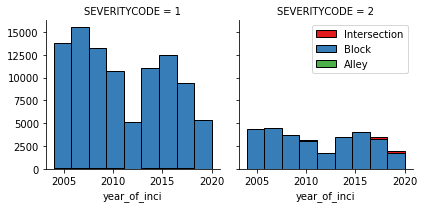

In [13]:
import seaborn as sns

#analysing the seveirty based on collision address type against each year
bins = np.linspace(df.year_of_inci.min(), df.year_of_inci.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="ADDRTYPE", palette="Set1", col_wrap=2)
g.map(plt.hist, 'year_of_inci', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

#plt.hist(df.SEVERITYCODE, bins=bins, histtype='bar', rwidth=0.8)
#plt.hist(df.SEVERITYCODE, bins=bins, histtype='bar', ec="k")
#plt.bar(df.year_of_inci, df.SEVERITYCODE, align='center', alpha=0.5)
#df_Severity = df[["SEVERITYCODE"]]
#ax=df_Severity.plot.bar(y='SEVERITYCODE',rot=0)


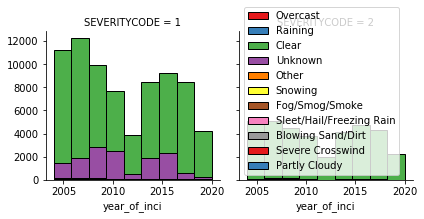

In [14]:
#analysing the seveirty based on weather condition against each year
bins = np.linspace(df.year_of_inci.min(), df.year_of_inci.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="WEATHER", palette="Set1", col_wrap=2)
g.map(plt.hist, 'year_of_inci', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

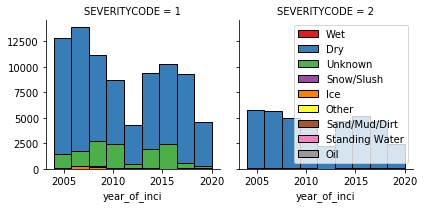

In [15]:
#analysing the seveirty based on road condition against each year
bins = np.linspace(df.year_of_inci.min(), df.year_of_inci.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="ROADCOND", palette="Set1", col_wrap=2)
g.map(plt.hist, 'year_of_inci', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

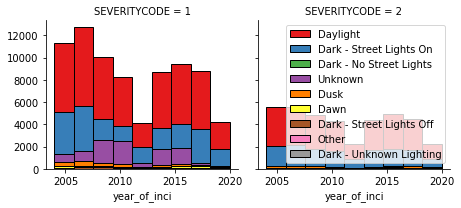

In [16]:
#analysing the seveirty based on light condition against each year
bins = np.linspace(df.year_of_inci.min(), df.year_of_inci.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="LIGHTCOND", palette="Set1", col_wrap=10)
g.map(plt.hist, 'year_of_inci', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

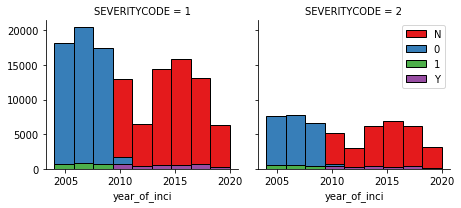

In [17]:
#analysing the seveirty based on influence condition against each year
bins = np.linspace(df.year_of_inci.min(), df.year_of_inci.max(), 10)
g = sns.FacetGrid(df, col="SEVERITYCODE", hue="UNDERINFL", palette="Set1", col_wrap=10)
g.map(plt.hist, 'year_of_inci', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [18]:
df.groupby(['SEVERITYCODE'])['COLLISIONTYPE'].value_counts(normalize=True)

SEVERITYCODE  COLLISIONTYPE
1             Parked Car       0.341761
              Angles           0.158722
              Rear Ended       0.146424
              Other            0.132640
              Sideswipe        0.121420
              Left Turn        0.062524
              Right Turn       0.017697
              Head On          0.008686
              Pedestrian       0.005067
              Cycles           0.005059
2             Rear Ended       0.256724
              Angles           0.238403
              Other            0.106952
              Pedestrian       0.103872
              Left Turn        0.094686
              Cycles           0.083014
              Parked Car       0.046582
              Sideswipe        0.043852
              Head On          0.015259
              Right Turn       0.010657
Name: COLLISIONTYPE, dtype: float64

In [19]:
#replacing str values with equivalent integer values
df['ADDRTYPE_1'] = df['ADDRTYPE'].fillna('Block').replace(['Alley','Block','Intersection'],['0','1','2']).astype('float64')
df['COLLISIONTYPE_1'] = df['COLLISIONTYPE'].fillna('Other').replace(['Angles','Cycles','Head On','Left Turn','Other','Parked Car','Pedestrian','Rear Ended','Right Turn','Sideswipe'],['0','1','2','3','4','5','6','7','8','9']).astype('float64')
df['LIGHTCOND_1'] = df['LIGHTCOND'].fillna('Unknown').replace(['Dark - No Street Lights','Dark - Street Lights Off','Dark - Street Lights On','Dark - Unknown Lighting','Dawn','Daylight','Dusk','Other','Unknown'],['0','1','2','3','4','5','6','7','8']).astype('float64')
df['HITPARKEDCAR_1'] = df['HITPARKEDCAR'].fillna('N').replace(['N','Y'],['0','1']).astype('float64')
df['ROADCOND_1'] = df['ROADCOND'].fillna('Unknown').replace(['Dry','Ice','Oil','Other','Sand/Mud/Dirt','Snow/Slush','Standing Water','Unknown','Wet'],['0','1','2','3','4','5','6','7','8']).astype('float64')
df['WEATHER_1'] = df['WEATHER'].fillna('Unknown').replace(['Blowing Sand/Dirt','Blowing Snow','Clear','Fog/Smog/Smoke','Other','Overcast','Partly Cloudy','Raining','Severe Crosswind','Sleet/Hail/Freezing Rain','Snowing','Unknown'],['0','1','2','3','4','5','6','7','8','9','10','11']).astype('float64')
df['UNDERINFL_1'] = df['UNDERINFL'].fillna('0').replace(['N','Y'],['0','1']).astype('float64')
df['SDOT_COLCODE_1'] = df['SDOT_COLCODE'].fillna('0.0').astype('float64')
df['INCDTTM_1'] = df['INCDTTM'].astype("datetime64[ns]").dt.dayofweek.apply(lambda x: 1 if (x>3)  else 0)

In [63]:
#df['SEVERITYCODE_1']=df['SEVERITYCODE'].fillna('0').replace(['0','1','2','2b','3'],['0','1','2','3','4']).astype('float64')

In [20]:
Feature = df[['ADDRTYPE_1','COLLISIONTYPE_1','LIGHTCOND_1','ROADCOND_1','WEATHER_1','SDOT_COLCODE_1','UNDERINFL_1','HITPARKEDCAR_1','INCDTTM_1','SEVERITYCODE' ]]
Feature.head()

,ADDRTYPE_1,COLLISIONTYPE_1,LIGHTCOND_1,ROADCOND_1,WEATHER_1,SDOT_COLCODE_1,UNDERINFL_1,HITPARKEDCAR_1,INCDTTM_1,SEVERITYCODE
0,2.0,0.0,5.0,8.0,5.0,11.0,0.0,0.0,0,2
1,1.0,9.0,2.0,8.0,7.0,16.0,0.0,0.0,0,1
2,1.0,5.0,5.0,0.0,5.0,14.0,0.0,0.0,0,1
3,1.0,4.0,5.0,0.0,2.0,11.0,0.0,0.0,1,1
4,2.0,0.0,5.0,8.0,7.0,11.0,0.0,0.0,0,2


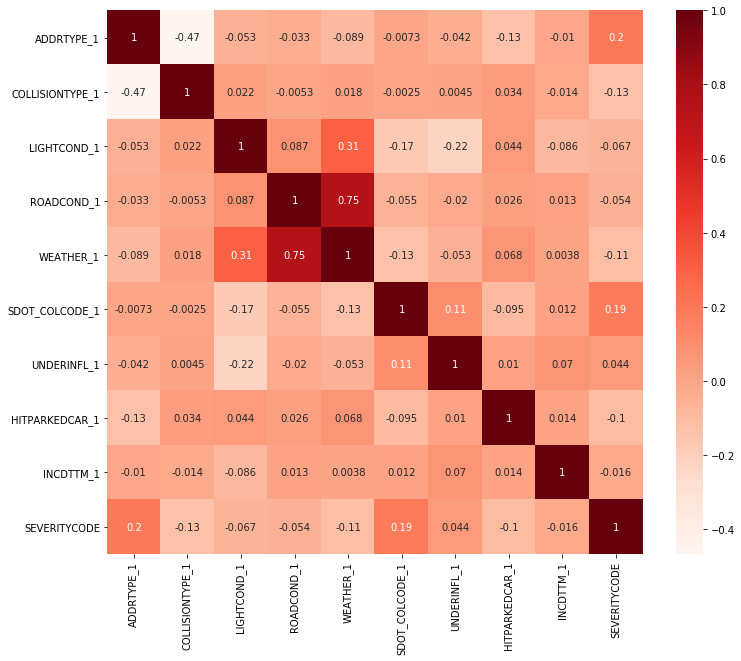

In [21]:
plt.figure(figsize=(12,10))
cor = Feature.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [22]:
#KNN Model
Feature1 = df[['ADDRTYPE_1','COLLISIONTYPE_1','LIGHTCOND_1','ROADCOND_1','WEATHER_1','SDOT_COLCODE_1','UNDERINFL_1','HITPARKEDCAR_1','INCDTTM_1']]

In [23]:
X=Feature1
X[0:5]

,ADDRTYPE_1,COLLISIONTYPE_1,LIGHTCOND_1,ROADCOND_1,WEATHER_1,SDOT_COLCODE_1,UNDERINFL_1,HITPARKEDCAR_1,INCDTTM_1
0,2.0,0.0,5.0,8.0,5.0,11.0,0.0,0.0,0
1,1.0,9.0,2.0,8.0,7.0,16.0,0.0,0.0,0
2,1.0,5.0,5.0,0.0,5.0,14.0,0.0,0.0,0
3,1.0,4.0,5.0,0.0,2.0,11.0,0.0,0.0,1
4,2.0,0.0,5.0,8.0,7.0,11.0,0.0,0.0,0


In [24]:
y = df['SEVERITYCODE'].values
y[0:5]

array([2, 1, 1, 1, 2])

In [25]:
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


array([[ 1.39942178, -1.63329265,  0.28232455,  1.4403421 ,  0.24318799,
        -0.41751024, -0.2217116 , -0.19619929, -0.85019462],
       [-0.69049979,  1.6395935 , -1.39630003,  1.4403421 ,  0.9040864 ,
         0.31042563, -0.2217116 , -0.19619929, -0.85019462],
       [-0.69049979,  0.18497743,  0.28232455, -0.73914132,  0.24318799,
         0.01925128, -0.2217116 , -0.19619929, -0.85019462],
       [-0.69049979, -0.17867658,  0.28232455, -0.73914132, -0.74815962,
        -0.41751024, -0.2217116 , -0.19619929,  1.17620128],
       [ 1.39942178, -1.63329265,  0.28232455,  1.4403421 ,  0.9040864 ,
        -0.41751024, -0.2217116 , -0.19619929, -0.85019462]])

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (155738, 9) (155738,)
Test set: (38935, 9) (38935,)


In [27]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [28]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat_KNN=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat_KNN)

    
    std_acc[n-1]=np.std(yhat_KNN==y_test)/np.sqrt(yhat_KNN.shape[0])

mean_acc

array([0.62583794, 0.7289842 , 0.69128034, 0.72911262, 0.71683575,
       0.73039682, 0.7080262 , 0.72854758, 0.72012328, 0.72906126,
       0.72726339, 0.7337614 , 0.7302684 , 0.73745987])

In [29]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 0.7374598690124566 with k= 14


In [30]:
k = 14
#Train Model and Predict  
neigh14 = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat14_KNN = neigh14.predict(X_test)
yhat14_KNN[0:5]
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh14.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat14_KNN))

Train set Accuracy:  0.737392287046193
Test set Accuracy:  0.7374598690124566


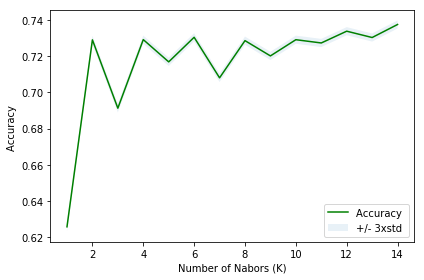

In [31]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [32]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat14_KNN, average='weighted')

0.7112975224027157

In [33]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat14_KNN)

0.7374598690124566

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
Feature2 = df[['ADDRTYPE_1','COLLISIONTYPE_1','LIGHTCOND_1','ROADCOND_1','WEATHER_1','SDOT_COLCODE_1','UNDERINFL_1','HITPARKEDCAR_1','INCDTTM_1']]

In [36]:
incidentTree  = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
incidentTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [37]:
incidentTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [38]:
yhat_inciDT = incidentTree.predict(X_test)

In [39]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat_inciDT))

DecisionTrees's Accuracy:  0.7518171311159625


In [40]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_inciDT)

0.7518171311159625

In [41]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_inciDT, average='weighted')

0.6880245532349181

In [35]:
#!pip install graphviz

In [42]:
#!conda install -c conda-forge python-graphviz -y
!conda install -c conda-forge pydotplus -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - pydotplus


The following packages will be UPDATED:

    certifi:         2020.6.20-py36_0  anaconda --> 2020.6.20-py36h9f0ad1d_0 conda-forge
    openssl:         1.1.1g-h7b6447c_0 anaconda --> 1.1.1h-h516909a_0        conda-forge

The following packages will be DOWNGRADED:

    ca-certificates: 2020.7.22-0       anaconda --> 2020.6.20-hecda079_0     conda-forge

Preparing transaction: done
Verifying transaction: done
Executing transaction: done


In [44]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

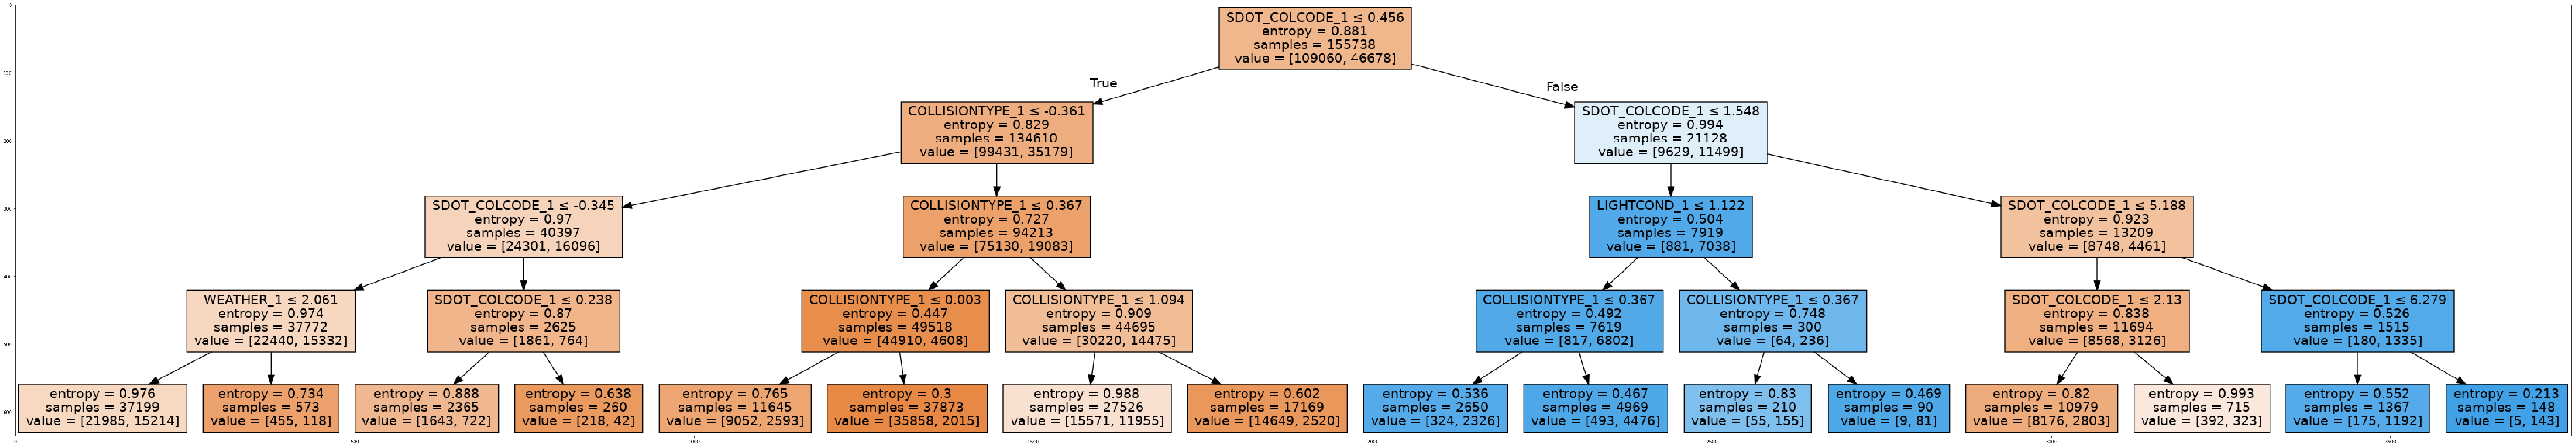

In [45]:
dot_data = StringIO()
filename = "loanTree.png"
featureNames = Feature2.columns[0:9]
len(featureNames)
targetNames = df["SEVERITYCODE"].unique().tolist()
#out=tree.export_graphviz(incidentTree,out_file=dot_data, feature_names=featureNames, class_names= np.unique(y_train), filled=True,  special_characters=True,rotate=False)
out=tree.export_graphviz(incidentTree,out_file=dot_data, feature_names=featureNames, filled=True,  special_characters=True,rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

In [53]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [54]:
yhat_inciLR = LR.predict(X_test)
yhat_inciLR

array([1, 1, 1, ..., 1, 1, 1])

In [55]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_inciLR, average='weighted')

0.6585175565700814

In [56]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat_inciLR)

0.7256709901117246

In [57]:
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.83731471, 0.16268529],
       [0.58991402, 0.41008598],
       [0.92673495, 0.07326505],
       ...,
       [0.75268111, 0.24731889],
       [0.90120682, 0.09879318],
       [0.7866251 , 0.2133749 ]])